In [1]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, Subset
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import random
from tqdm import tqdm


## Dataset
MNIST is a dataset of 60,000 training and 10,000 testing images of handwritten digits, with (human done) labels of which digit is written. 
Here's what the dataset looks like to us humans:

<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftheanets.readthedocs.io%2Fen%2Fstable%2F_images%2Fmnist-digits-small.png&f=1&nofb=1" width="350" height="250" /><center>






In [2]:
def load_mnist(batch_size=32, train=True):

    to_tensor_transform = torchvision.transforms.ToTensor()
   
    
    dataset = torchvision.datasets.MNIST(root='./hw3', train=train, download=True, transform=to_tensor_transform)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size)
    

    return dataset, dataloader

In [3]:
def plot_image_and_label(image, label):
    
    '''
    Takes in an image and label and shows them using matplotlib 
    this is used to visualize the data and also the outputs of our network
    '''

    plt.imshow(image)
    if type(label) is not int:
        _,predicted = torch.max(label,1)
        plt.title("Best label = " + str(predicted.item()) + ", with Score: " + str(round(label[0][predicted].item() * 100,2)))
    else:
        plt.title("Label = " + str(label))
    plt.show()
    return

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./hw3/MNIST/raw/train-images-idx3-ubyte.gz to ./hw3/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./hw3/MNIST/raw/train-labels-idx1-ubyte.gz to ./hw3/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./hw3/MNIST/raw/t10k-images-idx3-ubyte.gz to ./hw3/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./hw3/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./hw3/MNIST/raw



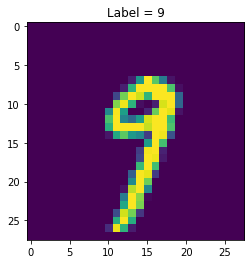

In [4]:
train_dataset, train_dataloader = load_mnist(batch_size=1, train=True)
ex_image, ex_label = train_dataset[random.randint(0,1000)]
plot_image_and_label(ex_image.reshape(28,28), ex_label)

In [5]:
class MyPerceptron(nn.Module):

    def __init__(self, input_size, output_size):
        super(MyPerceptron, self).__init__()

        self.input_size = input_size # making the input size accessible

        self.lin = nn.Linear(input_size, output_size, bias=True)
        print(input_size, output_size)


    def forward(self, x):

        x = x.view(-1, self.input_size)   # reshapes the input to work with the batches

        out = self.lin(x)

        return out



784 10


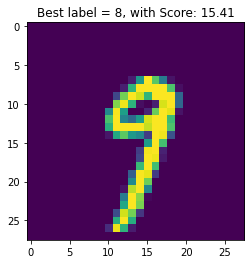

In [6]:
test_model = MyPerceptron(784, 10)
test_output = test_model(ex_image.flatten())

plot_image_and_label(ex_image.reshape(28,28), test_output)

In [7]:
class MyMLP(nn.Module):

    def __init__(self, input_size, output_size):
        super(MyMLP, self).__init__()

        self.input_size = input_size # making the input size accessible

        
        self.lin1 = nn.Linear(in_features=input_size, out_features=output_size)
        self.relu = nn.ReLU(inplace=True)
        self.lin2 = nn.Linear(in_features=output_size, out_features=output_size*2)
        self.relu = nn.ReLU(inplace=True)
        self.lin3 = nn.Linear(in_features=output_size*2, out_features=output_size)
   

    def forward(self, x):

        x = x.view(-1, self.input_size)   

        x = self.lin1(x)
        x = self.lin2(x)
        X = self.lin3(x)

        out = x

        return out

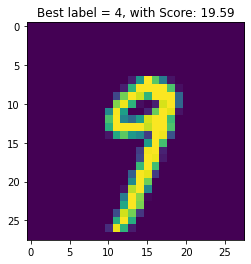

In [8]:
test_model = MyMLP(784, 10)
test_output = test_model(ex_image.flatten()) 

plot_image_and_label(ex_image.reshape(28,28), test_output)

In [9]:
import torch.optim as optim

In [10]:
model = MyMLP(784, 10)                                       

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss_function(input, target)
output.backward()                         
                            
print("BEFORE GRADIENT STEP:")
ex_pred = model(ex_image.flatten())
print("prediction:",ex_pred)
ex_label = torch.Tensor([1]).long()
print("label:",ex_label)


optimizer.zero_grad() 

ex_loss1 = loss_function(ex_pred, ex_label)
print("loss",ex_loss1.item())

ex_loss1.backward() 

print()
print("AFTER GRADIENT STEP:")
optimizer.step() # This takes the step to train

ex_pred = model(ex_image.flatten())
print("prediction:",ex_pred)
ex_label = torch.Tensor([1]).long()
print("label:",ex_label)

ex_loss2 = loss_function(ex_pred, ex_label)
print("loss",ex_loss2.item())

print()
print("Difference in loss:", (ex_loss1 - ex_loss2).item())
print("This should be some positive number to say we reduced loss")


BEFORE GRADIENT STEP:
prediction: tensor([[-0.0564,  0.0602, -0.1317, -0.1748,  0.2500, -0.0197,  0.0659, -0.1385,
          0.1057,  0.4227,  0.2175, -0.0629,  0.1186, -0.1557, -0.4126, -0.1711,
          0.2031,  0.0768, -0.0313,  0.2898]], grad_fn=<AddmmBackward0>)
label: tensor([1])
loss 2.9768123626708984

AFTER GRADIENT STEP:
prediction: tensor([[-0.0545,  0.0834, -0.1251, -0.1690,  0.2485, -0.0220,  0.0592, -0.1492,
          0.1052,  0.4131,  0.2221, -0.0571,  0.1166, -0.1630, -0.4052, -0.1665,
          0.2090,  0.0667, -0.0357,  0.2864]], grad_fn=<AddmmBackward0>)
label: tensor([1])
loss 2.95369291305542

Difference in loss: 0.023119449615478516
This should be some positive number to say we reduced loss


In [11]:
def training(model, loss_function, optimizer, train_dataloader, n_epochs, update_interval):

    '''
    Updates the parameters of the given model using the optimizer of choice to
    reduce the given loss_function

    This will iterate over the dataloader 'n_epochs' times training on each batch of images
    
    To get the gradient (which is stored internally in the model) use .backward() from the loss tensor
    and to apply it use .step() on the optimizer

    In between steps you need to zero the gradient so it can be recalculated -- use .zero_grad for this
    '''
    
    losses = []

    for n in range(n_epochs):
        for i, (image, label) in enumerate(tqdm(iter(train_dataloader))):

            # TODO Complete the training loop using the instructions above
            # Hint: the above code essentially does one training step

            ##############################################################
            optimizer.zero_grad()
            outputs = model(image)
            loss = loss_function(outputs, label)
            loss.backward()
            optimizer.step()


            ##############################################################
        
            if i % update_interval == 0:
                losses.append(round(loss.item(), 2)) # This will append your losses for plotting -- please use "loss" as the name for your loss
        
    return model, losses



100%|██████████| 938/938 [00:05<00:00, 161.33it/s]


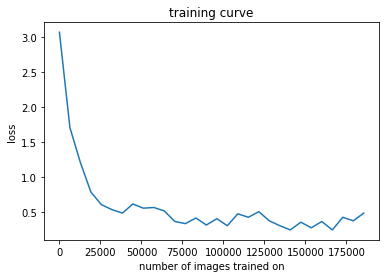

In [12]:


lr = 0.02               
batch_size = 64        
update_interval = 100   
n_epochs = 3            

train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)

model = MyMLP(784, 10)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

trained_model, losses = training(model, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)

plt.plot(np.arange(len(losses)) * batch_size * update_interval, losses)
plt.title("training curve")
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()


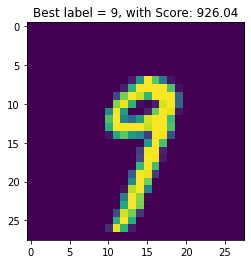

In [13]:
trained_output = trained_model(ex_image.flatten()) 

plot_image_and_label(ex_image.reshape(28,28), trained_output)

In [14]:
def testing(model, loss_function, test_data):

    '''
    This function will test the given model on the given test_data
    it will return the accuracy and the test loss (given by loss_function) 
    '''
    
    sum_loss = 0
    n_correct = 0
    total = 0

    for i, (image, label) in enumerate(tqdm(iter(test_data))):

        pred = model(image)
        loss = loss_function(pred, label)
        sum_loss += loss.item()

        _, predicted = torch.max(pred,1)
        n_correct += (predicted == label).sum()
        total += label.size(0)
    
    test_acc = round(((n_correct / total).item() * 100), 2)
    avg_loss = round(sum_loss / len(test_data), 2)

    print("test accuracy:", test_acc)
    print("test loss:", avg_loss )

    return test_acc, avg_loss


print("testing the previously trained model on test dataset of MNIST")
test_dataset, test_dataloader = load_mnist(batch_size=10000, train=False)
_,_ = testing(trained_model, loss_function, test_dataloader)

testing the previously trained model on test dataset of MNIST


100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

test accuracy: 90.28
test loss: 0.34


In [15]:
def train_and_test(model, loss_function, optimizer, batch_size, update_interval, n_epochs):


    _, train_dataloader = load_mnist(batch_size=batch_size, train=True)
    trained_model, losses = training(model, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)

    _, test_dataloader = load_mnist(batch_size=10000, train=False)
    test_acc, test_loss = testing(trained_model, loss_function, test_dataloader)

    plt.plot(np.arange(len(losses)) * batch_size * update_interval, losses, color="b", label="train loss")
    plt.hlines(test_loss, 0, len(losses) * batch_size * update_interval, color='r', label="test loss")
    plt.legend()
    plt.title("training curve")
    plt.xlabel("number of images trained on")
    plt.ylabel("loss")
    plt.show()

    return trained_model, test_loss

    

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

test accuracy: 89.65
test loss: 0.36


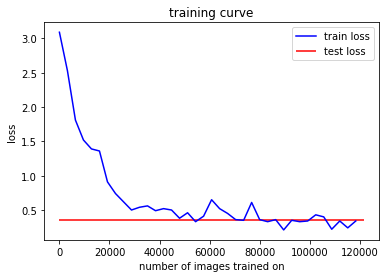

In [16]:
lr = 0.01               # The size of the step taken when doing gradient descent
batch_size = 32        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 2            # The number of times we train through the entire dataset

model = MyMLP(784, 10)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

_, _ = train_and_test(model, loss_function, optimizer, batch_size=batch_size, update_interval=update_interval, n_epochs=n_epochs)

In [17]:
class MyCNN(nn.Module):

    def __init__(self, input_size, output_size):
        super(MyCNN, self).__init__()

        self.input_size = input_size 

      
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=15, kernel_size=3)
        self.relu = nn.ReLU()      
        
       
        cnn_out_size = 15*22*22       

        self.mlp = MyMLP(cnn_out_size, output_size) 


    def forward(self, x):

        x = x.view(-1, 1, 28, 28)   

        x = self.conv1(x)
        #print(x.size())
        x = self.relu(x)
        x = self.conv2(x)
        #print(x.size())
        x = self.relu(x)
        x = self.conv3(x)
        #print(x.size())
        x = self.relu(x)
        out = x



        self.filtered = out  # Saving the output from the convolutions so that we can see them 
        out = out.flatten()  
        out = self.mlp(out)  

        return out

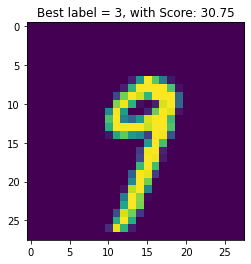

In [18]:
test_model = MyCNN(784, 10)
test_output = test_model(ex_image)

plot_image_and_label(ex_image.reshape(28,28), test_output)


100%|██████████| 1/1 [00:02<00:00,  2.75s/it]

test accuracy: 96.98
test loss: 0.1


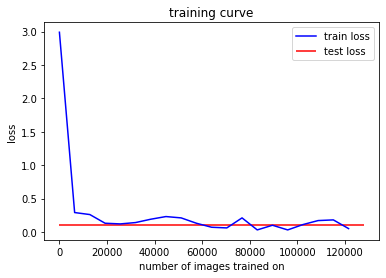

In [19]:
lr = 0.01               # The size of the step taken when doing gradient descent
batch_size = 64        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 2            # The number of times we train through the entire dataset

model = MyCNN(784, 10)                                          
loss_function = nn.CrossEntropyLoss()                          
optimizer = torch.optim.Adam(model.parameters(), lr=lr)       

trained_model, _ = train_and_test(model, loss_function, optimizer, batch_size=batch_size, update_interval=update_interval, n_epochs=n_epochs)

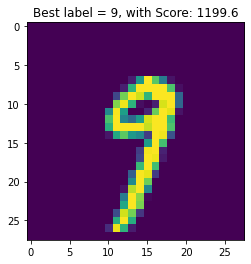

In [20]:
test_output = trained_model(ex_image)

plot_image_and_label(ex_image.reshape(28,28), test_output)

In [21]:
def display_filters(params, name):

    '''
    This is a little bit of code I wrote that will plot out an arbitrary
    number of images in one big plot so that it works for whatever size conv you used
    '''


    fig = plt.figure(figsize=(10, 7)) ## You MIGHT need to change this if you made really big convolutions

    rows = len(params)//5 + 1

    for i,filter in enumerate(params):
        fig.add_subplot(rows, 5, i+1)
        plt.imshow(filter)
        plt.axis('off')
        plt.title(name + "filter #"+str(i))
    
    plt.show

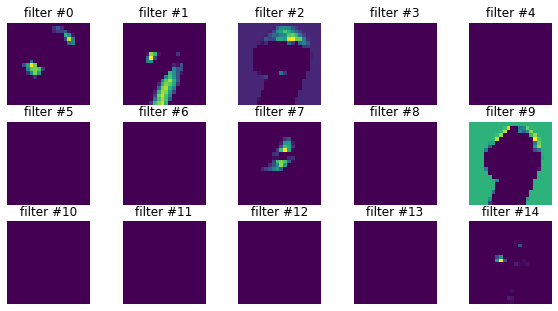

In [22]:
filtered = model.filtered[0].detach().numpy()
display_filters(filtered, "")